# Using `Environment` to run RRT

This example shows how to use Environment to run RRT

Taken from 16.413 F19 PS6

In [1]:
from shapely.geometry import Point, Polygon
import yaml

from utils.check_path import check_path
from utils.environment import Environment, plot_environment, plot_poly
from rrt import rrt

`Environment` is a definable 2D space with obstacles.

(7.0, 5.5)


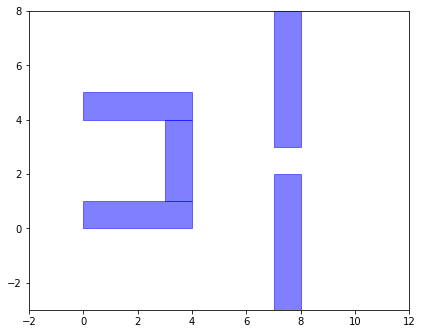

In [2]:
# Example that shows how to create an empty environment.
env = Environment(None)

# Each obstacle is a Polygon (shapely class)
# Each Polygon is defined by a list of its vertices
env.add_obstacles([Polygon([(0,0),(0,1),(4,1),(4,0)]),
                  Polygon([(0,4),(0,5),(4,5),(4,4)]),
                  Polygon([(3,1),(3,4),(4,4),(4,1)]),
                  Polygon([(7,3),(7,8),(8,8),(8,3)]),
                  Polygon([(7,-3),(7,2),(8,2),(8,-3)])
                  ])

# We can use the plot_environment function to plot the defined environment
# the bounds (minx,miny,maxx,maxy) specify the bounds that are plotted.
bounds = (-2, -3, 12, 8)
# The plot_environment function returns a matplotlib axes instance.
# This can be used to add more elements to the plot.
ax = plot_environment(env, bounds=bounds)

In [6]:
# In shapely, a point is defined with the Point class
start_point = Point((2,2.5))

# The point can be "buffered" by any amount (0.3) to create
# a polygonal approximation of a circle.
# The resolution parameter specifies how precise that approximation is.
start_ball = start_point.buffer(0.3, resolution=3)

# We can use the provided plot_poly function to plot polygons in the plot.
end_pose = Polygon([(10,5), (10,6), (11,6), (11,5)])

# this won't display a plot now, but will style these objects in the next call to `plot_environment`
plot_poly(ax, start_ball, 'magenta')
plot_poly(ax, end_pose, 'green')

(6.769230769230769, 5.5)


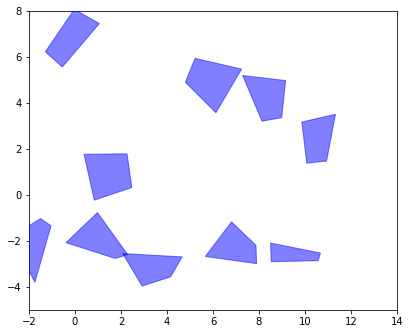

In [7]:
# If you like the environment you have defined, you can save it to a yaml file

# env.save_to_yaml("test_environment.yaml") # Uncomment this line if you want to try the save function

# You can also load environments from yaml files
# In this case "simple.yaml" is an example environment that we
# are giving you to test.
environment = Environment("../utils/simple.yaml")
bounds = (-2, -5, 14, 8)

# The bounds parameter is optional.
# If you don't specify it, the plot_environment will calculate the bounds on its own
plot_environment(environment, bounds=bounds)

Now let's actually run RRT with the `environment`.

(7.0, 5.5)


Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

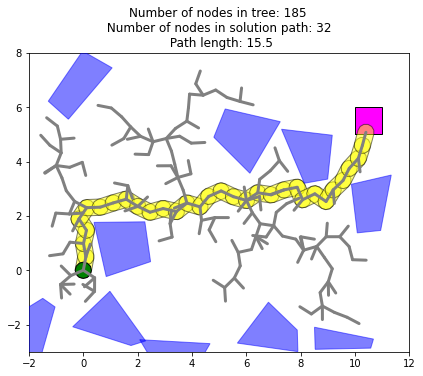

In [8]:
radius = 0.3
bounds = (-2, -3, 12, 8)
start = (0, 0)
goal_region = Polygon([(10, 5), (10, 6), (11, 6), (11, 5)])

path = rrt(bounds, environment, start, radius, goal_region)

# The check path function checks that the path is a list,
# its elements are tuples and the start and end are correct
# It doesn't check collisions.
check_path(path, bounds, environment, start, radius, goal_region)